# **Testing Bell´s Inequality with Qiskit**

In [2]:
!pip install qiskit==0.39.2
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

The key point to test Bell´s inequality on a quantum computer is to understand how to perform measurements in an arbitrary bases oriented with any angles $\theta$ y $\phi$.

Given two orthogonal quantum states
$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} 
$$

and

$$
|\psi^{'}\rangle =\cos({\frac{\pi-\theta}{2}})|0\rangle +e^{i(\pi+\phi)} \sin({\frac{\pi-\theta}{2}})|1\rangle=\begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix} 
$$

the rotation unitary operatos 


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

and

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



transform the basis  $|\psi\rangle, |\psi^{'}\rangle$ into the computational basis 
$|0\rangle, |1\rangle$ (salvo una fase)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$
$$
R_Y(-\theta) R_Z(-\phi)|\psi^{'}\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}  =e^{i\phi/2}
    \begin{pmatrix} 0 \\\\ 1 \end{pmatrix}
    =e^{i\phi/2}|1\rangle
$$

In order to measure a qubit in the basis $|\psi\rangle, |\psi^{'}\rangle$ we just need to apply $R_Y(-\theta) R_Z(-\phi)$ to that qubit just before measuring it on the computational basis used by Qiskit $|0\rangle, |1\rangle$.

Using this mathematical tool we can program the code of Bell's inequality on a quantum computer using Qiskit.

First we prepare the single Bell state

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

with the following Qiskit circuit:

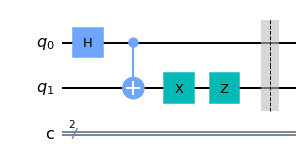

In [3]:
from qiskit import QuantumCircuit, Aer,execute
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
#qc.ry(-2*np.pi/3,1)
stv = qi.Statevector.from_instruction(qc)
#qc.rz(0,1)
#qc.ry(-2*np.pi/3,1)
#qc.measure(0,0)
#qc.measure(1,1)
qc.draw("mpl")


We check that the quantum state at the barrier is indeed 

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

In [4]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

The Qiskit code to perform each of the 9 experiments with the measurements of the states of the 2 qubits along each of the 3 directions with 

$\theta = 0$, $\theta = \frac{2\pi}{3}$ and $\theta = \frac{4\pi}{3}$ on the XZ plane is the following:

In [14]:
backend = Aer.get_backend('qasm_simulator')
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experimento A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
job11 = execute(qc11,backend, shots=shots)
result = job11.result()
print("Results :",result.get_counts(qc11))
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']

print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
job12 = execute(qc12,backend, shots=shots)
result = job12.result()
print("Results :",result.get_counts(qc12))
N_corr += job12.result().get_counts()['11']+job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']

print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
job13 = execute(qc13,backend, shots=shots)
result = job13.result()
print("Results :",result.get_counts(qc13))
N_corr += job13.result().get_counts()['11']+job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']

print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
job21 = execute(qc21,backend, shots=shots)
result = job21.result()
print("Results :",result.get_counts(qc21))
N_corr += job21.result().get_counts()['11']+job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']

print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
job22 = execute(qc22,backend, shots=shots)
result = job22.result()
print("Results :",result.get_counts(qc22))
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']

print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
job23 = execute(qc23,backend, shots=shots)
result = job23.result()
print("Results :",result.get_counts(qc23))
N_corr += job23.result().get_counts()['11']+job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']

print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
job31 = execute(qc31,backend, shots=shots)
result = job31.result()
print("Results :",result.get_counts(qc31))
N_corr += job31.result().get_counts()['11']+job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']

print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
job32 = execute(qc32,backend, shots=shots)
result = job31.result()
print("Results :",result.get_counts(qc32))
N_corr += job32.result().get_counts()['11']+job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']

print("\n                        Experimento A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
job33 = execute(qc33,backend, shots=shots)
result = job33.result()
print("Results :",result.get_counts(qc33))
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']
print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr)

                       Experimento A1B1
     ┌───┐                ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░──╫─┤M├
          └───┘└───┘└───┘ ░  ║ └╥┘
c_0: ════════════════════════╩══╬═
                                ║ 
c_1: ═══════════════════════════╩═
                                  
Results : {'10': 472, '01': 528}

                       Experimento A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c_0: ═════════════════════════════════════════════════╩══╬═
                                                         ║ 
c_1: ════════════════════════════════════════════════════╩═
                                                           
Results : {'01': 130, '10': 123